In [11]:
# !pip install -r requirements.txt    
!pip install yfinance
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [12]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython import display
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline

import plotting
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

from datetime import datetime,date

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.metrics import mean_squared_error
from keras.layers import LSTM
import nsepy as ns
import streamlit as st
import nsepy.constants as ns



import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)


#### Download stock data then export as CSV


In [13]:

import yfinance as yfin

tickers = ("HDFCBANK.NS", "SBIN.NS")

start = "1990-01-01"
end = '2022-12-31'

# download yahoo finance data for specific dates
fin_data = yfin.download(tickers, start, end)

fin_data

[*********************100%***********************]  2 of 2 completed


Adj Close                    Close                     High  \
            HDFCBANK.NS     SBIN.NS  HDFCBANK.NS     SBIN.NS  HDFCBANK.NS   
Date                                                                        
1996-01-01     2.389957   12.651089     2.980000   18.823240     3.030000   
1996-01-02     2.385947   12.248414     2.975000   18.224106     3.025000   
1996-01-03     2.393967   11.921828     2.985000   17.738192     2.995000   
1996-01-04     2.377927   11.880609     2.965000   17.676863     2.980000   
1996-01-05     2.373917   11.814025     2.960000   17.577793     2.980000   
...                 ...         ...          ...         ...          ...   
2022-12-26  1629.449951  597.099976  1629.449951  597.099976  1639.000000   
2022-12-27  1631.099976  601.900024  1631.099976  601.900024  1635.949951   
2022-12-28  1629.800049  601.049988  1629.800049  601.049988  1633.000000   
2022-12-29  1641.300049  611.799988  1641.300049  611.799988  1643.500000   
2022-12-30  1628.150024  613.700012  1628.150024  613.700012  1645.000000   

                                Low                     Open              \
               SBIN.NS  HDFCBANK.NS     SBIN.NS  HDFCBANK.NS     SBIN.NS   
Date                                                                       
1996-01-01   18.978922     2.925000   18.540184     3.030000   18.691147   
1996-01-02   18.964767     2.950000   17.738192     2.980000   18.894005   
1996-01-03   18.568489     2.950000   17.643839     2.975000   18.327892   
1996-01-04   17.832542     2.940000   17.223972     2.985000   17.502312   
1996-01-05   17.785366     2.950000   17.459852     2.965000   17.738192   
...                ...          ...         ...          ...         ...   
2022-12-26  601.700012  1590.000000  570.700012  1599.500000  574.000000   
2022-12-27  603.099976  1613.500000  593.299988  1633.000000  600.400024   
2022-12-28  607.000000  1623.099976  598.549988  1623.099976  600.900024   
2022-12-29  618.000000  1611.000000  597.150024  1620.099976  600.000000   
2022-12-30  620.549988  1620.000000  611.349976  1645.000000  615.250000   

                Volume              
           HDFCBANK.NS     SBIN.NS  
Date                                
1996-01-01      350000  43733533.0  
1996-01-02      412000  56167280.0  
1996-01-03      284000  68296318.0  
1996-01-04      282000  86073880.0  
1996-01-05      189000  76613039.0  
...                ...         ...  
2022-12-26     4953661  13201587.0  
2022-12-27     3963386   9638618.0  
2022-12-28     4345935   7988631.0  
2022-12-29     5506448  20130392.0  
2022-12-30     3561320  13052895.0  

[6793 rows x 12 columns]

In [14]:
fin_data.to_csv('Amit_Stock_Price_Prector_tool_23yrsData_Downloaded_from_NSE.csv')  # convert data to csv

#### Check the dataset

In [92]:
fin_data.shape

(6793, 12)

In [16]:

fin_data.head() 
fin_data.head()

Adj Close                  Close                   High  \
           HDFCBANK.NS    SBIN.NS HDFCBANK.NS    SBIN.NS HDFCBANK.NS   
Date                                                                   
1996-01-01    2.389957  12.651089       2.980  18.823240       3.030   
1996-01-02    2.385947  12.248414       2.975  18.224106       3.025   
1996-01-03    2.393967  11.921828       2.985  17.738192       2.995   
1996-01-04    2.377927  11.880609       2.965  17.676863       2.980   
1996-01-05    2.373917  11.814025       2.960  17.577793       2.980   

                              Low                   Open             \
              SBIN.NS HDFCBANK.NS    SBIN.NS HDFCBANK.NS    SBIN.NS   
Date                                                                  
1996-01-01  18.978922       2.925  18.540184       3.030  18.691147   
1996-01-02  18.964767       2.950  17.738192       2.980  18.894005   
1996-01-03  18.568489       2.950  17.643839       2.975  18.327892   
1996-01-04  17.832542       2.940  17.223972       2.985  17.502312   
1996-01-05  17.785366       2.950  17.459852       2.965  17.738192   

                Volume              
           HDFCBANK.NS     SBIN.NS  
Date                                
1996-01-01      350000  43733533.0  
1996-01-02      412000  56167280.0  
1996-01-03      284000  68296318.0  
1996-01-04      282000  86073880.0  
1996-01-05      189000  76613039.0

In [17]:

fin_data.tail()

Adj Close                    Close                     High  \
            HDFCBANK.NS     SBIN.NS  HDFCBANK.NS     SBIN.NS  HDFCBANK.NS   
Date                                                                        
2022-12-26  1629.449951  597.099976  1629.449951  597.099976  1639.000000   
2022-12-27  1631.099976  601.900024  1631.099976  601.900024  1635.949951   
2022-12-28  1629.800049  601.049988  1629.800049  601.049988  1633.000000   
2022-12-29  1641.300049  611.799988  1641.300049  611.799988  1643.500000   
2022-12-30  1628.150024  613.700012  1628.150024  613.700012  1645.000000   

                                Low                     Open              \
               SBIN.NS  HDFCBANK.NS     SBIN.NS  HDFCBANK.NS     SBIN.NS   
Date                                                                       
2022-12-26  601.700012  1590.000000  570.700012  1599.500000  574.000000   
2022-12-27  603.099976  1613.500000  593.299988  1633.000000  600.400024   
2022-12-28  607.000000  1623.099976  598.549988  1623.099976  600.900024   
2022-12-29  618.000000  1611.000000  597.150024  1620.099976  600.000000   
2022-12-30  620.549988  1620.000000  611.349976  1645.000000  615.250000   

                Volume              
           HDFCBANK.NS     SBIN.NS  
Date                                
2022-12-26     4953661  13201587.0  
2022-12-27     3963386   9638618.0  
2022-12-28     4345935   7988631.0  
2022-12-29     5506448  20130392.0  
2022-12-30     3561320  13052895.0

In [18]:

fin_data.isnull().sum()

Adj Close  HDFCBANK.NS    0
           SBIN.NS        2
Close      HDFCBANK.NS    0
           SBIN.NS        2
High       HDFCBANK.NS    0
           SBIN.NS        2
Low        HDFCBANK.NS    0
           SBIN.NS        2
Open       HDFCBANK.NS    0
           SBIN.NS        2
Volume     HDFCBANK.NS    0
           SBIN.NS        2
dtype: int64

#### # handing missing values by using front fill and back fill methods

In [19]:

fin_data.fillna(method='ffill', inplace=True)  
fin_data.fillna(method='bfill', inplace=True)  

fin_data.isnull().sum()

Adj Close  HDFCBANK.NS    0
           SBIN.NS        0
Close      HDFCBANK.NS    0
           SBIN.NS        0
High       HDFCBANK.NS    0
           SBIN.NS        0
Low        HDFCBANK.NS    0
           SBIN.NS        0
Open       HDFCBANK.NS    0
           SBIN.NS        0
Volume     HDFCBANK.NS    0
           SBIN.NS        0
dtype: int64

##### view descriptive statistics of adjusted close process of the stocks

In [20]:

fin_data[['Adj Close']].describe()

Adj Close             
       HDFCBANK.NS      SBIN.NS
count  6793.000000  6793.000000
mean    363.033678   152.287668
std     463.039529   133.509359
min       1.952868     9.716630
25%      20.548925    19.724916
50%     134.575043   148.246399
75%     519.264038   242.389206
max    1669.291016   625.500000

In [21]:
# view general info
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6793 entries, 1996-01-01 to 2022-12-30
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, HDFCBANK.NS)  6793 non-null   float64
 1   (Adj Close, SBIN.NS)      6793 non-null   float64
 2   (Close, HDFCBANK.NS)      6793 non-null   float64
 3   (Close, SBIN.NS)          6793 non-null   float64
 4   (High, HDFCBANK.NS)       6793 non-null   float64
 5   (High, SBIN.NS)           6793 non-null   float64
 6   (Low, HDFCBANK.NS)        6793 non-null   float64
 7   (Low, SBIN.NS)            6793 non-null   float64
 8   (Open, HDFCBANK.NS)       6793 non-null   float64
 9   (Open, SBIN.NS)           6793 non-null   float64
 10  (Volume, HDFCBANK.NS)     6793 non-null   int64  
 11  (Volume, SBIN.NS)         6793 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 689.9 KB


##### Focusing on the maximum close feature is important in stock price analysis as it can provide insights into trend analysis, resistance levels, and potential targets for the stock.

In [22]:
def max_close(df, stocks):
    """This calculates and returns the maximum closing value of a specific stock"""
    return df['Close'][stocks].max()


def test_max():
    """This tests the max_close function"""
    for stock in tickers:
        print("Maximum Closing Value for {} is {}".format(
            stock, max_close(fin_data, stock)))


test_max()

Maximum Closing Value for HDFCBANK.NS is 1688.699951171875
Maximum Closing Value for SBIN.NS is 625.5


##### calculate the mean volume for the stocks


In [23]:
def mean_vol(stocks, df):
    """ This calculates and returns the minimum volume of a specific stock"""
    return df['Volume'][stocks].mean()  

def test_mean():
    """ This tests the max_close function"""
    for stocks in ["HDFCBANK.NS", "SBIN.NS"]:
        print("Mean Volume for {} is {}".format(
            stocks, mean_vol(stocks, fin_data)))

test_mean()

Mean Volume for HDFCBANK.NS is 5044739.33225379
Mean Volume for SBIN.NS is 31878753.824083615


### Plotting stock prices

In [24]:

def plot_adj(df, title, stocks, y=0):
    ax = df['Adj Close'][stocks].plot(title=title, figsize=(10, 8), ax=None)
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.axhline(y=y, color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

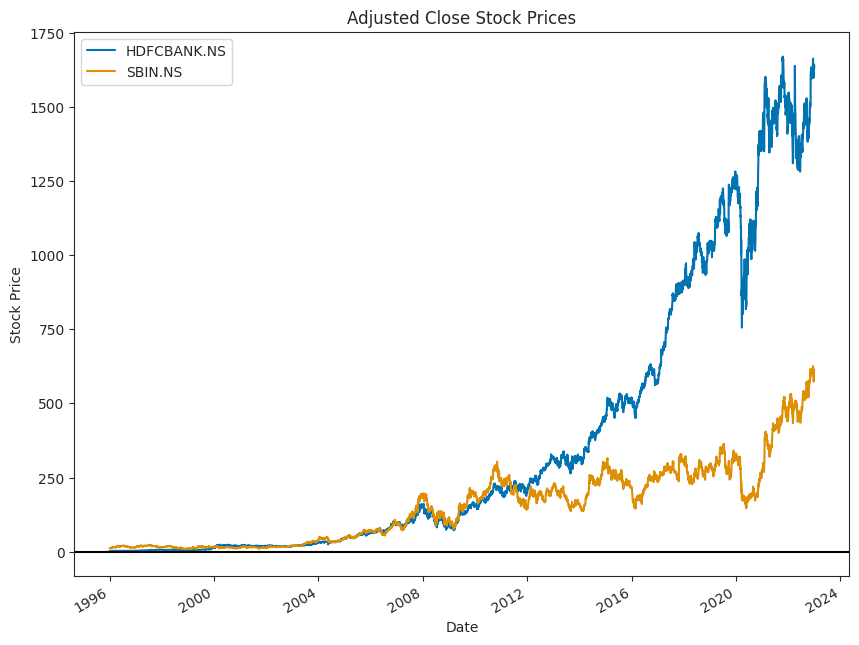

In [25]:

stocks = ["HDFCBANK.NS", "SBIN.NS"]
plot_adj(fin_data, "Adjusted Close Stock Prices", stocks)

In [26]:

fin_data['Adj Close']['HDFCBANK.NS']

Date
1996-01-01       2.389957
1996-01-02       2.385947
1996-01-03       2.393967
1996-01-04       2.377927
1996-01-05       2.373917
                 ...     
2022-12-26    1629.449951
2022-12-27    1631.099976
2022-12-28    1629.800049
2022-12-29    1641.300049
2022-12-30    1628.150024
Name: HDFCBANK.NS, Length: 6793, dtype: float64

In [27]:
fin_data['Adj Close']['SBIN.NS']

Date
1996-01-01     12.651089
1996-01-02     12.248414
1996-01-03     11.921828
1996-01-04     11.880609
1996-01-05     11.814025
                 ...    
2022-12-26    597.099976
2022-12-27    601.900024
2022-12-28    601.049988
2022-12-29    611.799988
2022-12-30    613.700012
Name: SBIN.NS, Length: 6793, dtype: float64

In [28]:
fin_data.loc[:, ('Adj Close', ["HDFCBANK.NS", "SBIN.NS"])]

Adj Close            
            HDFCBANK.NS     SBIN.NS
Date                               
1996-01-01     2.389957   12.651089
1996-01-02     2.385947   12.248414
1996-01-03     2.393967   11.921828
1996-01-04     2.377927   11.880609
1996-01-05     2.373917   11.814025
...                 ...         ...
2022-12-26  1629.449951  597.099976
2022-12-27  1631.099976  601.900024
2022-12-28  1629.800049  601.049988
2022-12-29  1641.300049  611.799988
2022-12-30  1628.150024  613.700012

[6793 rows x 2 columns]

In [29]:
fin_data['Adj Close'].loc['2012-01-01':'2022-12-31', ['SBIN.NS', 'HDFCBANK.NS']]

,SBIN.NS,HDFCBANK.NS
Date,,
2012-01-02,145.608521,197.498596
2012-01-03,152.586334,203.189651
2012-01-04,151.727493,205.109833
2012-01-05,151.405472,205.271790
2012-01-06,149.643127,209.736710
...,...,...
2022-12-26,597.099976,1629.449951
2022-12-27,601.900024,1631.099976
2022-12-28,601.049988,1629.800049


In [30]:

def plot_data1(df, stocks, title, ylabel='Stock Price', y=0):
    """This funtion plots stock prices"""
    ax = df.plot(title=title, figsize=(10, 8), ax=None, fontsize=5)
    ax.set_xlabel("Date")
    ax.set_label(ylabel)
    ax.axhline(y=y, color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

def selected_plot(df, columns, stocks, start_idx, end_idx):
    """This function plots specific stocks over a given date range"""
    plot_data1(df[columns].loc[start_idx:end_idx, stocks],
               stocks, title="Plot for selected Stocks")

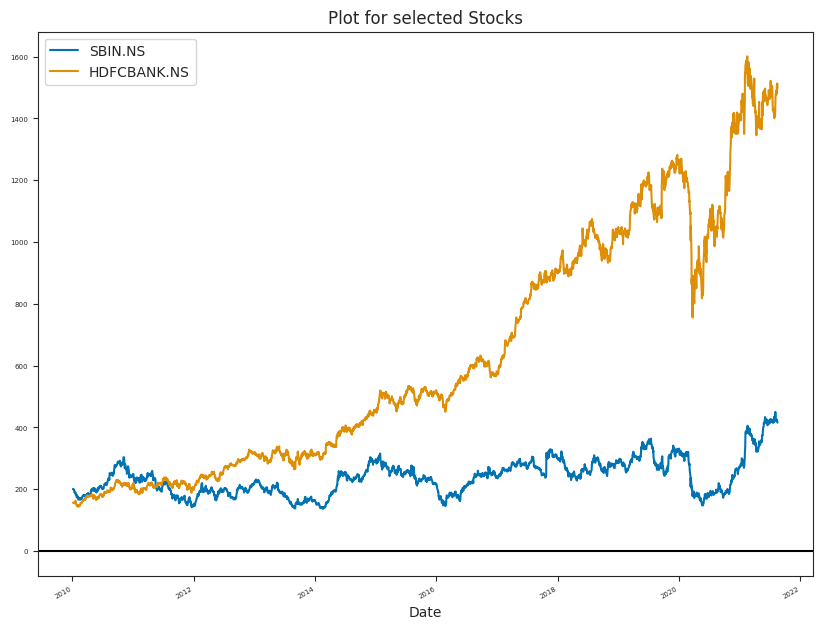

In [31]:
def test_select():
    """This function plots stock data based on specific columns, symbols, and date ranges """
    # specify columns to plot and stock symbols
    columns = 'Adj Close'
    stocks = ['SBIN.NS', 'HDFCBANK.NS']

    # Get stock data
    df = fin_data

    # Slice and plot
    selected_plot(df, columns, stocks, '2010-01-01', '2021-08-17')


test_select()  # run the plot function

## Normalizing the data
We want to know how the different types of stocks went up and down with respect to the others. 

In [32]:
def plot_data2(df, stocks, title='Stock Prices', ylabel="Stock Price", y=0, start='2001-01-01', end='2021-08-17'):
    """ This function creates a plot of adjusted close stock prices
    inputs:
    df - dataframea
    title - plot title
    stocks - the stock symbols of each company
    ylabel - y axis label
    y - horizontal line(integer)
    output: the plot of adjusted close stock prices
    """
    df_new = df[start:end]
    # ax = df_new['Adj Close'][stocks].plot(title=title, figsize=(16,8), ax = None)
    ax = df_new.plot(title=title, figsize=(16, 8), ax=None)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.axhline(y=y, color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()



def normalize_data(df):
    """ 
    This function normalizes the stock prices using the first row of the dataframe
    input - stock data
    output - normalized stock data
    """
    return df/df.iloc[0, :]

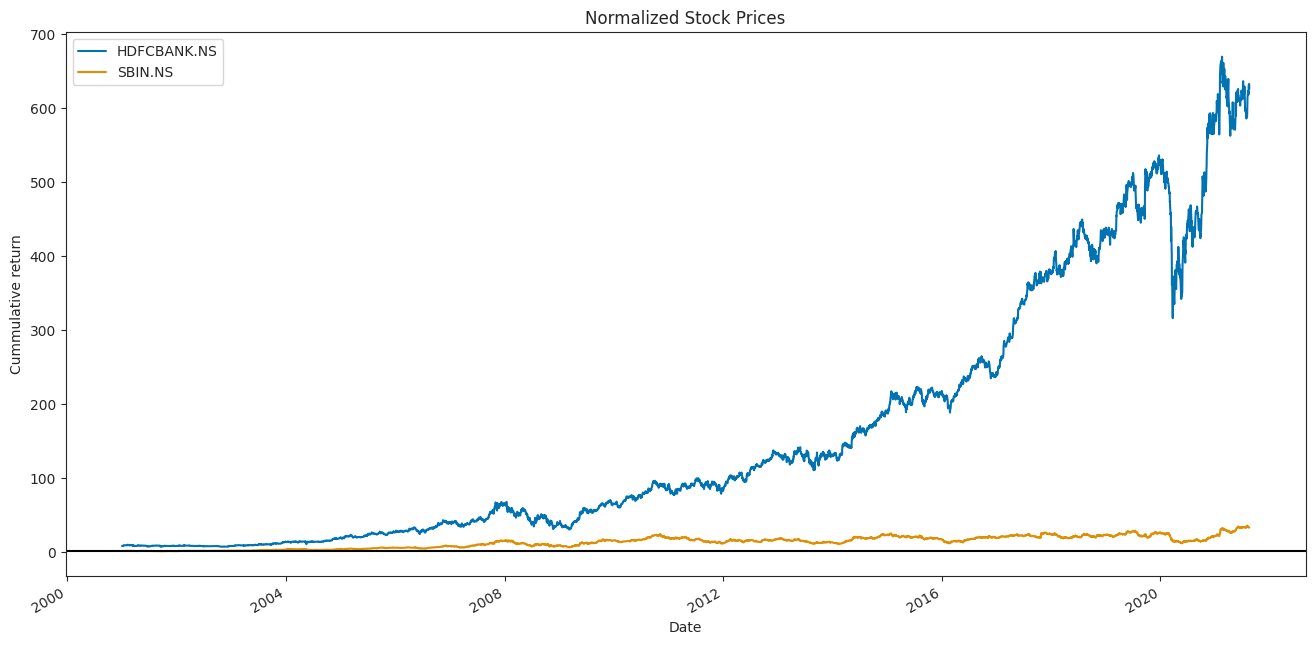

In [33]:

stocks = ["HDFCBANK.NS", "SBIN.NS"]

plot_data2(normalize_data(fin_data['Adj Close'][stocks]), stocks,
           title="Normalized Stock Prices", ylabel='Cummulative return', y=1)

### Cumulative Return (Pandemic Effect)

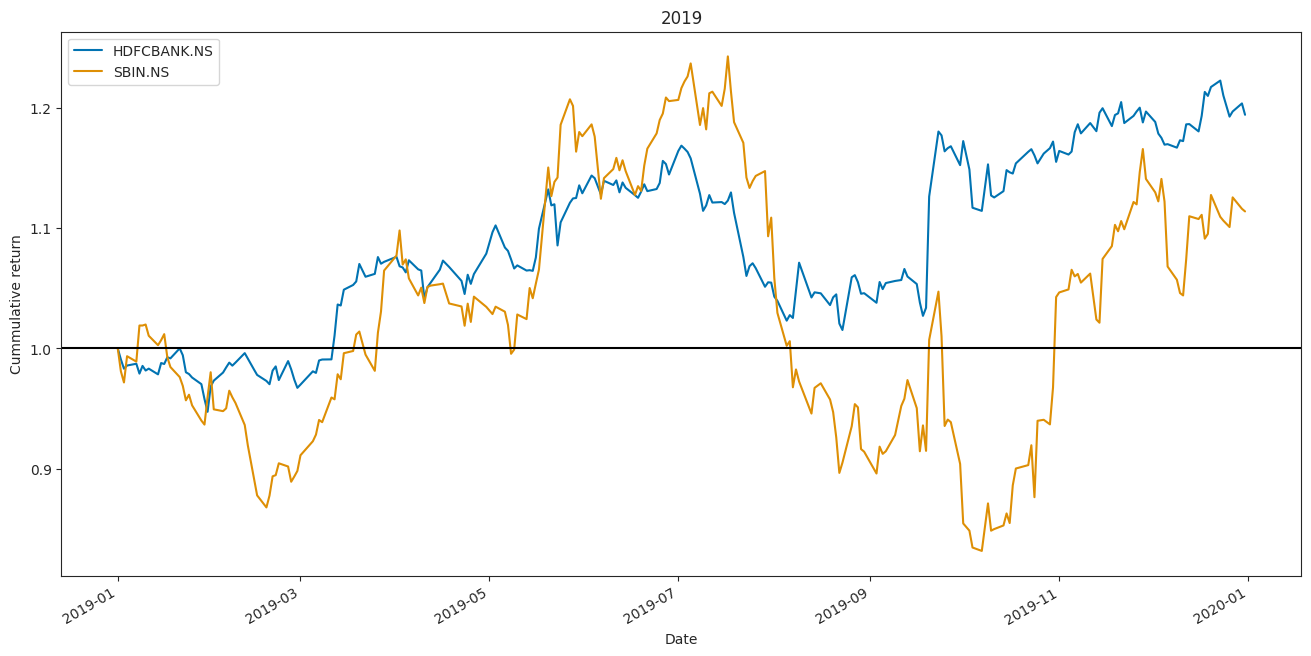

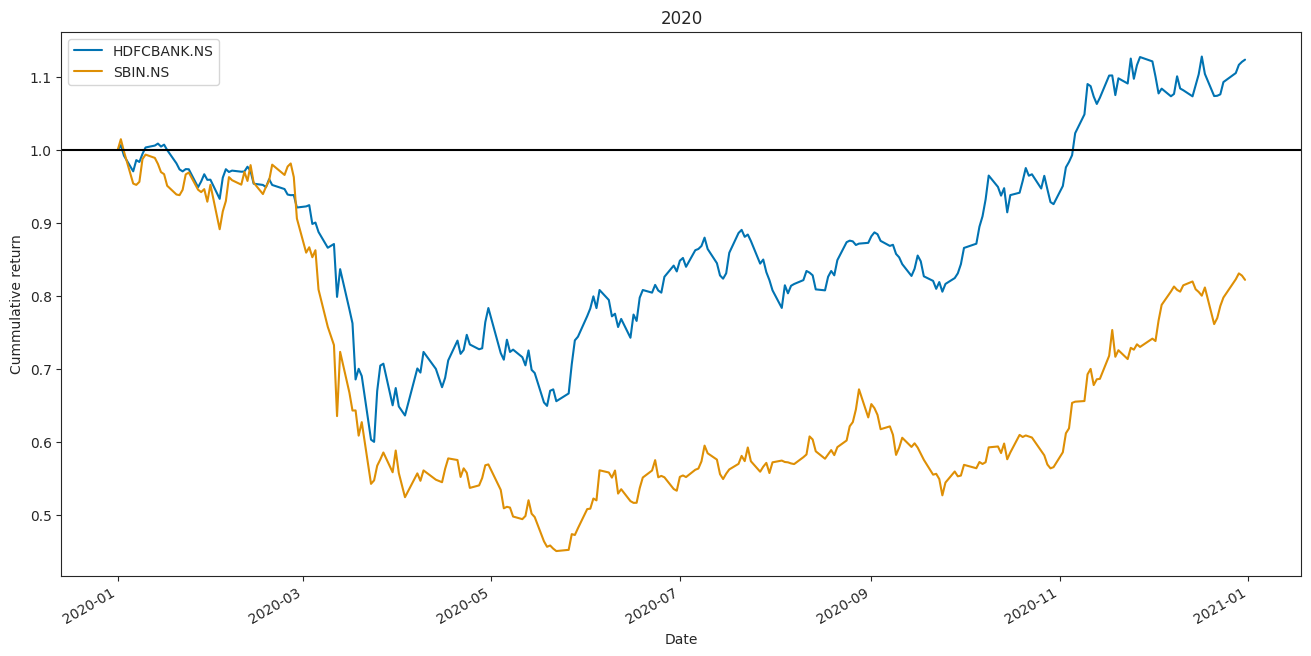

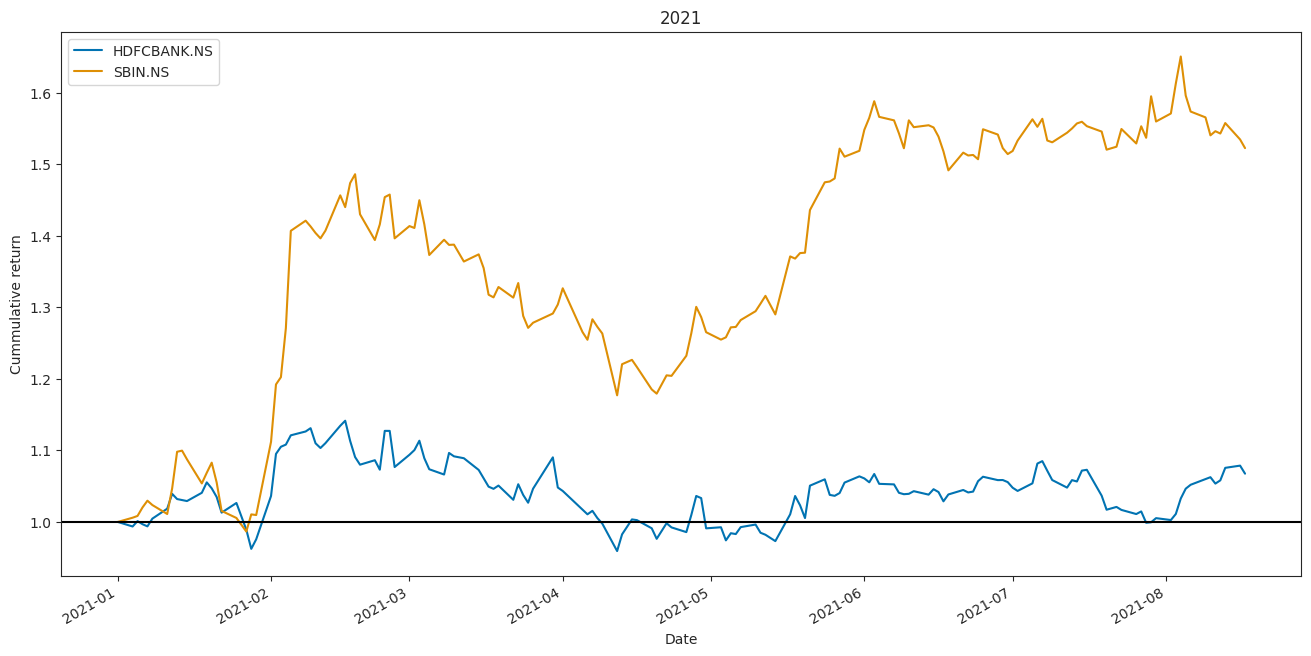

In [34]:
stocks = ["HDFCBANK.NS",  "SBIN.NS"]

plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2019-01-01':'2019-12-31']), stocks,
           title='2019', ylabel='Cummulative return', y=1, start='2019-01-01', end='2019-12-31')  # 2019
plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2020-01-01':'2020-12-31']), stocks,
           title='2020', ylabel='Cummulative return', y=1, start='2020-01-01', end='2020-12-31')  # 2020
plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2021-01-01':'2021-08-17']), stocks,
           title='2021', ylabel='Cummulative return', y=1, start='2021-01-01', end='2021-08-17')  # 2021

### Computing the Rolling mean and Bollinger Bands

In [35]:

def rolling_stats(df, stocks, type_, window=20):
    """
    This function computes the rolling mean and Bollinger bands
    inputs : 
    df - dataframe
    stocks - the type of stocks we would be analyzing
    type_ - the price type of the rolling calculation
    window - number of days used to calculate the statistics
    output: 
    rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """

    val = df[(type_, stocks)]
    rolling_mean = df[(type_, stocks)].rolling(window=window).mean()
    rolling_std = df[(type_, stocks)].rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2

    return val, rolling_mean, rolling_std, upper_band, lower_band

In [36]:

def rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean'):
    """
    This function plots the rolling mean and Bollinger bands
    inputs : 
    stocks - the type of stocks we would be analyzing
    val - value of the stock price type
    rolling_mean - rolling mean
    upper_band - stocks upper band
    lower_band - stocks lower band
    title - plot title
    output: 
    plot of rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """

    ax = rolling_mean.plot(title=title, figsize=(16, 8), label='Rolling Mean')
    plt.plot(upper_band, label='Upper Band')
    plt.plot(lower_band, label='Lower Band')
    plt.plot(val, label='Value of Stock')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()

    return ax

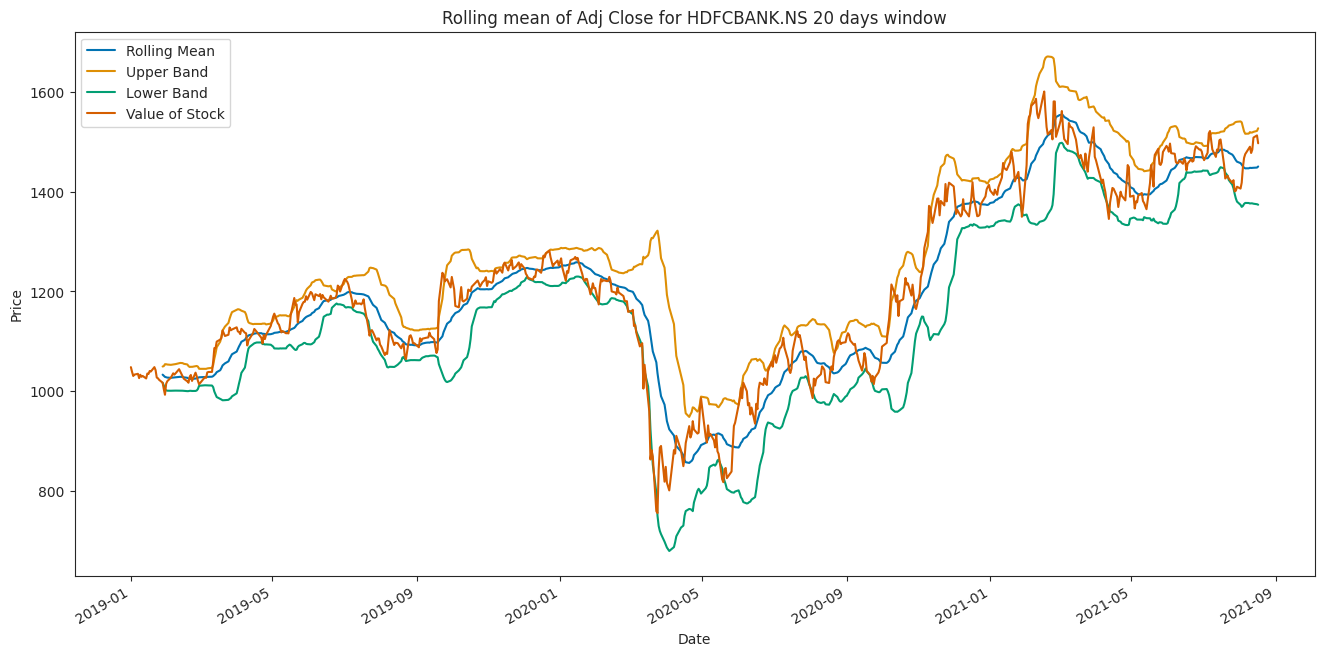

In [37]:
stocks = "HDFCBANK.NS"
type_ = 'Adj Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(
    fin_data['2019-01-01':'2021-08-17'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band,
             title='Rolling mean of {} for {} 20 days window'.format(type_, stocks))
plt.show()

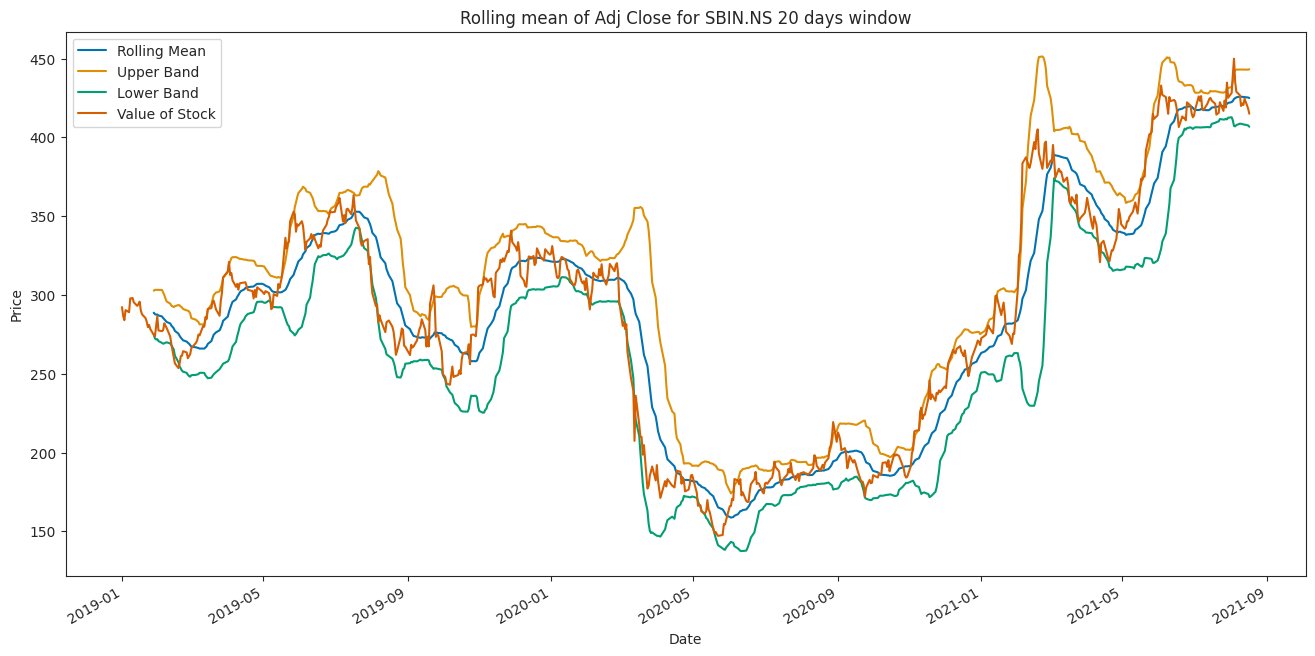

In [38]:
stocks = 'SBIN.NS'
type_ = 'Adj Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(
    fin_data['2019-01-01':'2021-08-17'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band,
             title='Rolling mean of {} for {} 20 days window'.format(type_, stocks))
plt.show()

### Computing Daily Returns

In [39]:
def daily_returns_cal(df, stocks):
    """
    This function computes and returns the daily return values
    input: df (dataframe) and stocks
    output: daily return values
    """

    daily_returns = (df[('Adj Close', stocks)][1:] /
                     df[('Adj Close', stocks)][:-1].values) - 1

    return daily_returns

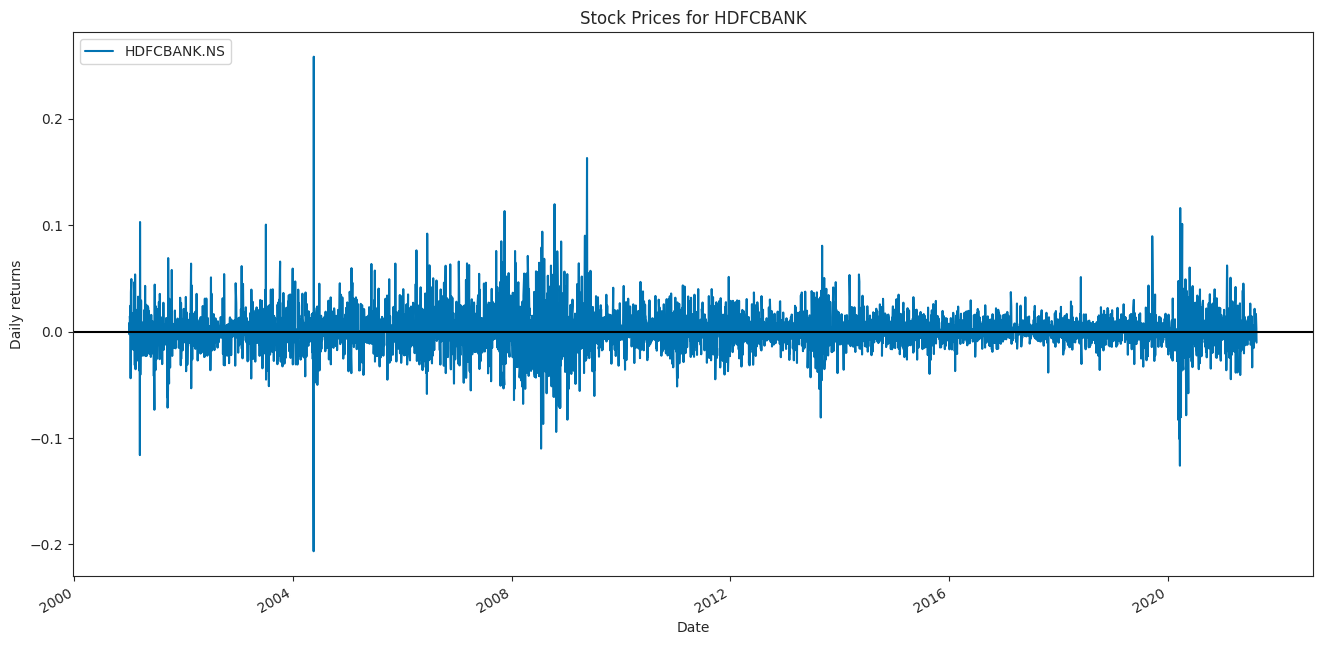

In [40]:
plot_data2(daily_returns_cal(fin_data, 'HDFCBANK.NS'), stocks=[
           'HDFCBANK.NS'], ylabel='Daily returns', title='Stock Prices for HDFCBANK', y=0)

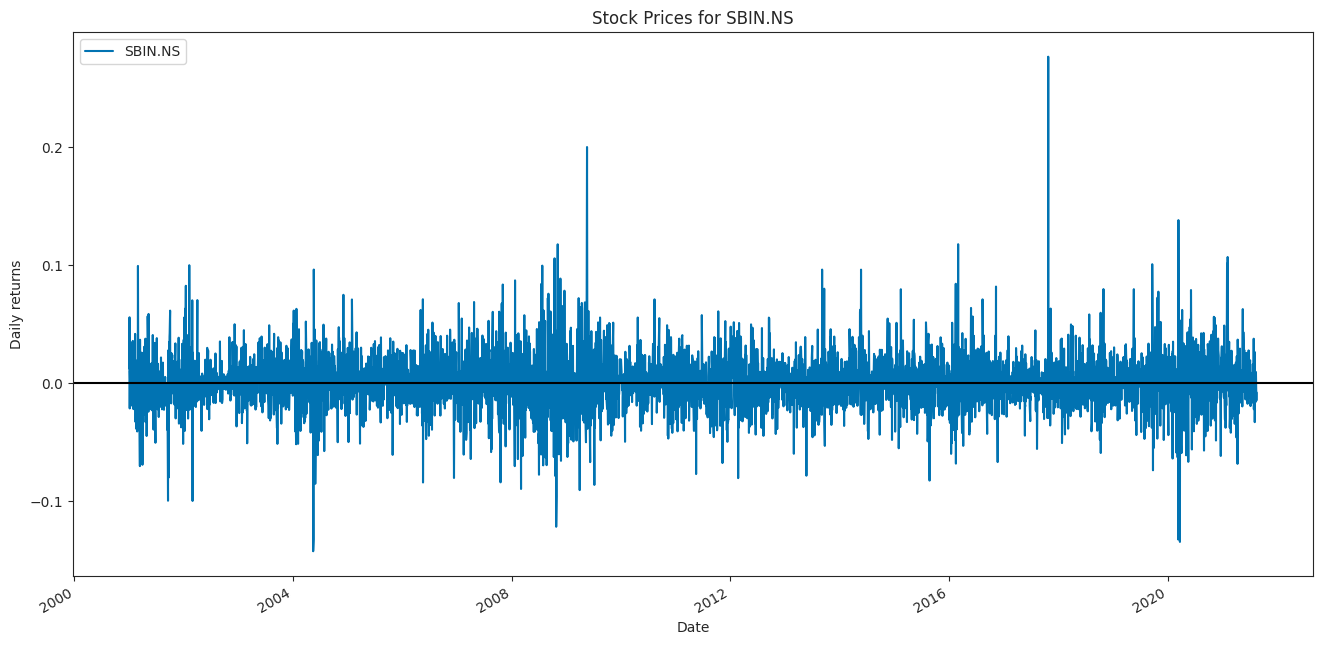

In [41]:
plot_data2(daily_returns_cal(fin_data, 'SBIN.NS'), stocks=[
           'SBIN.NS'], ylabel='Daily returns', title='Stock Prices for SBIN.NS', y=0)

## Modelling

In [42]:
def get_data(df, stocks):
    """
    This function gets a specific stock data and fills in any missing values using the fill forward and fill backward methods
    Input: 
    df - dataframe
    stocks - the type of stock
    Output - a cleaned dataset to be used for prediction
    """
    df1 = pd.DataFrame(data=df.iloc[:, df.columns.get_level_values(1) == stocks].values,
                       index=df.iloc[:, df.columns.get_level_values(
                           1) == stocks].index,
                       columns=df.iloc[:, df.columns.get_level_values(1) == stocks].columns.get_level_values(0))

    df1.fillna(method='ffill', inplace=True)
    df1.fillna(method='bfill', inplace=True)

    return df1

In [43]:
hdfc_data = get_data(fin_data, 'HDFCBANK.NS')
hdfc_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1996-01-01,2.389957,2.980,3.030,2.925,3.030,350000.0
1996-01-02,2.385947,2.975,3.025,2.950,2.980,412000.0
1996-01-03,2.393967,2.985,2.995,2.950,2.975,284000.0
1996-01-04,2.377927,2.965,2.980,2.940,2.985,282000.0
1996-01-05,2.373917,2.960,2.980,2.950,2.965,189000.0


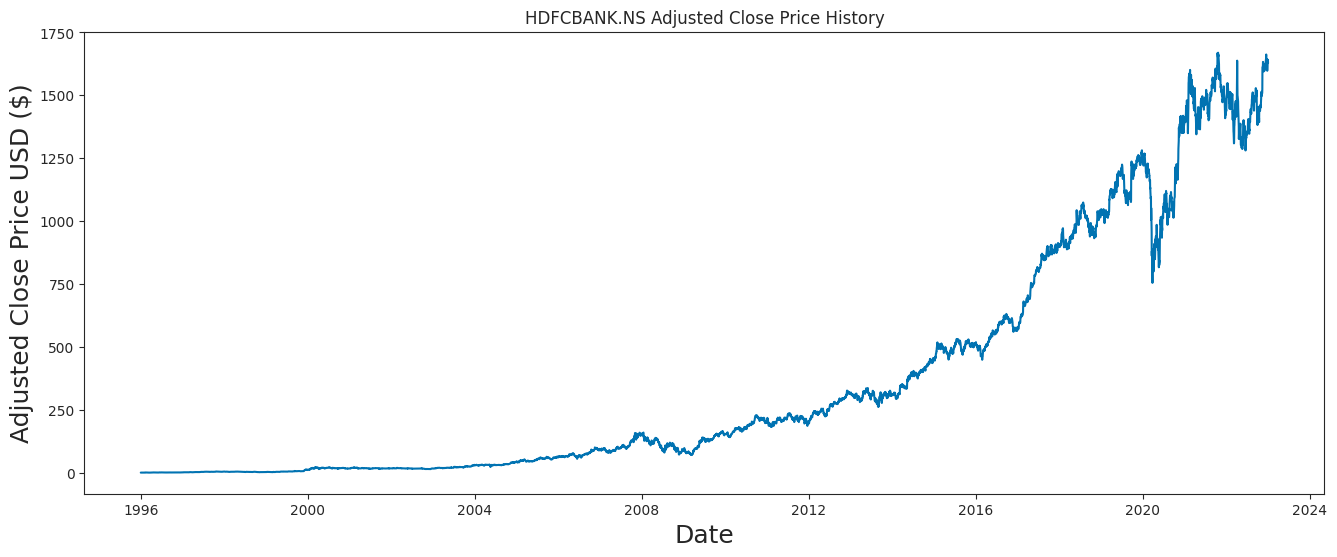

In [44]:
plt.figure(figsize=(16, 6))
plt.title('HDFCBANK.NS Adjusted Close Price History')
plt.plot(hdfc_data['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=18)
plt.show()

#### Predicting using Long Short-Term Memory (LSTM) 

In [45]:
hdfc_data.shape

(6793, 6)

In [46]:
hdfc_data.describe

<bound method NDFrame.describe of               Adj Close        Close         High          Low         Open  \
Date                                                                          
1996-01-01     2.389957     2.980000     3.030000     2.925000     3.030000   
1996-01-02     2.385947     2.975000     3.025000     2.950000     2.980000   
1996-01-03     2.393967     2.985000     2.995000     2.950000     2.975000   
1996-01-04     2.377927     2.965000     2.980000     2.940000     2.985000   
1996-01-05     2.373917     2.960000     2.980000     2.950000     2.965000   
...                 ...          ...          ...          ...          ...   
2022-12-26  1629.449951  1629.449951  1639.000000  1590.000000  1599.500000   
2022-12-27  1631.099976  1631.099976  1635.949951  1613.500000  1633.000000   
2022-12-28  1629.800049  1629.800049  1633.000000  1623.099976  1623.099976   
2022-12-29  1641.300049  1641.300049  1643.500000  1611.000000  1620.099976   
2022-12-30  1628.1

##### Predict the adjusted close price, predict the variables (removing Adj close from it) and then split the data into training and test sets


In [47]:
y = np.log(hdfc_data['Adj Close'].astype(int))
X = hdfc_data.drop('Adj Close', axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.20, random_state=42)

##### # Build the LSTM model for the stock


In [93]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


##### Compile the model

In [96]:
model.compile(optimizer='adam', loss='mean_squared_error')

##### Train the model - part 1  Initial parameters used for LSTM

In [97]:

model.fit(np.array(xtrain).reshape(-1, 5, 1),
          ytrain, batch_size=1, epochs=5, verbose=0)

##### Prediction and MAE Calculation


In [98]:
predictions = model.predict(np.array(xtest).reshape(-1, 5, 1))

mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

43/43 [==============================] - 1s 2ms/step


0.05627134960811694

##### Train the model - part 2

In [99]:
model.fit(np.array(xtrain).reshape(-1, 5, 1), ytrain,
          batch_size=100, epochs=10, verbose=0)
# predictions 2
predictions = model.predict(np.array(xtest).reshape(-1, 5, 1))

43/43 [==============================] - 0s 2ms/step


43/43 [==============================] - 0s 2ms/step


### LSTM Refinement
#### Final Parameters used to tune LSTM

# Build the LSTM model with the relu activation function


In [100]:
model2 = Sequential()
model2.add(LSTM(128, activation='relu', return_sequences=True,
           input_shape=(xtrain.shape[1], 1)))
model2.add(LSTM(64, activation='relu', return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')
# view model2 summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 25)                1625      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


##### Train the model - part 3

In [101]:

model2.fit(np.array(xtrain).reshape(-1, 5, 1),
           ytrain, batch_size=1, epochs=5, verbose=0)
# predictions 3
predictions2 = model2.predict(np.array(xtest).reshape(-1, 5, 1))
# calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions)
mean_abs_error2

43/43 [==============================] - 0s 2ms/step


0.025988592741243106

0.02834571752510028

##### Train the model - part 4 (increasing no. of epochs and batch_size) & Calculate MAE

In [102]:

model2.fit(np.array(xtrain).reshape(-1, 5, 1), ytrain,
           batch_size=100, epochs=10, verbose=0)
# predictions 3
predictions2 = model2.predict(np.array(xtest).reshape(-1, 5, 1))
# calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions)
mean_abs_error2

43/43 [==============================] - 0s 2ms/step


0.025988592741243106

##### plot showing the prediction and actual values

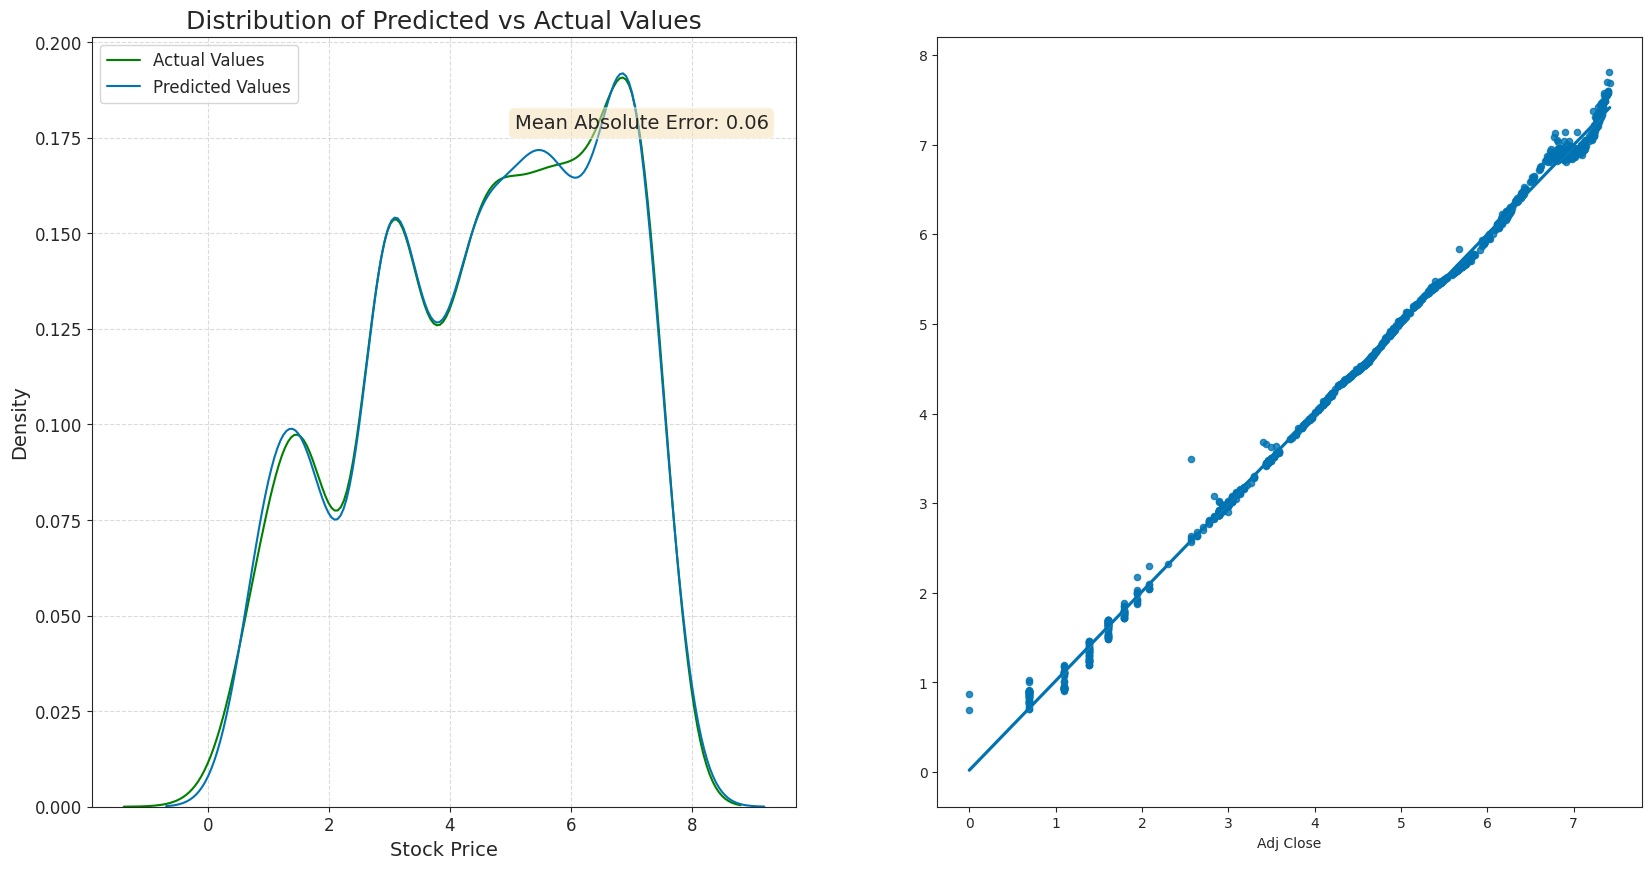

In [103]:

fig, axs = plt.subplots(1, 2, figsize=(20, 10), dpi=100)
axs[0].set_title('Distribution of Predicted vs Actual Values', fontsize=18)
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual Values', ax=axs[0])
ax2 = sns.kdeplot(data=predictions2, color="b",
                  label='Predicted Values', ax=ax1)

sns.regplot(x=ytest, y=predictions2, scatter_kws={"s": 20})
ax1.grid(True, linestyle='--', alpha=0.7)

ax1.set_xlabel('Stock Price', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)

# Add a text box to display the mean absolute error
mean_abs_error_text = "Mean Absolute Error: {:.2f}".format(mean_abs_error3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.6, 0.9, mean_abs_error_text, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

plt.show()
plt.close()

##### Training and prediction for the model part 5 (no activation function)

In [104]:

model.fit(np.array(xtrain).reshape(-1, 5, 1), ytrain,
          batch_size=800, epochs=50, verbose=0)
# predictions
predictions = model.predict(np.array(xtest).reshape(-1, 5, 1))

43/43 [==============================] - 0s 3ms/step


In [105]:
# calculation of the mean absolute error
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

0.025212455308462146

##### plot showing the prediction and actual values

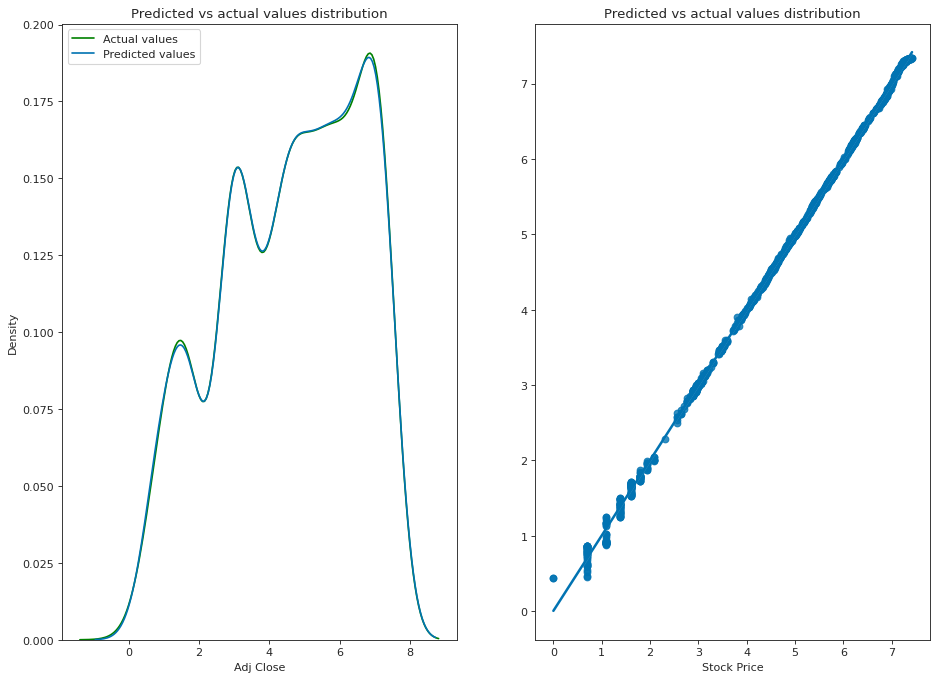

Mean absolute error of <keras.engine.sequential.Sequential object at 0x0000025F572F1930>: 0.026452967289496827


In [69]:


fig, axs = plt.subplots(1, 2, figsize=(14, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual values', ax=axs[0])
ax2 = sns.kdeplot(data=predictions, color="b",
                  label='Predicted values', ax=ax1)

sns.regplot(x=ytest, y=predictions)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
# plt.legend()
ax1.legend()
plt.show()
plt.close()

print("Mean absolute error of {0}: {1}".format(model, mean_abs_error3))

### Building the model for Adj close prediction

In [106]:
y = np.log(hdfc_data['Adj Close'].astype(int))
X = hdfc_data.drop('Adj Close', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (5434, 5)
y_train (5434,)
x_test (1359, 5)
y_test (1359,)


##### creating an instance of a Linear Regressor

In [107]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

##### Check the score, coef_ and intercept_ of the model

In [73]:
model_lin.score(X_train, y_train)
model_lin.coef_
model_lin.intercept_

print('The score of the model is {}, the coeficients  are {} and the intercept is {}'.format(
    model_lin.score(X_train, y_train), model_lin.coef_, model_lin.intercept_))

The score of the model is 0.6952588857172484, the coeficients  are [ 1.31324097e-02 -2.30092072e-02  6.64257299e-03  6.69031535e-03
  6.15740426e-08] and the intercept is 3.139573667996464


In [74]:
# prediction
predict = model_lin.predict(X_test)
predict  # view some predictions

array([3.77712828, 4.13452223, 7.36118677, ..., 6.84921887, 3.91589058,
       3.73544831])

In [75]:
# calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.882618353086609

#### Plot showing the prediction and actual values

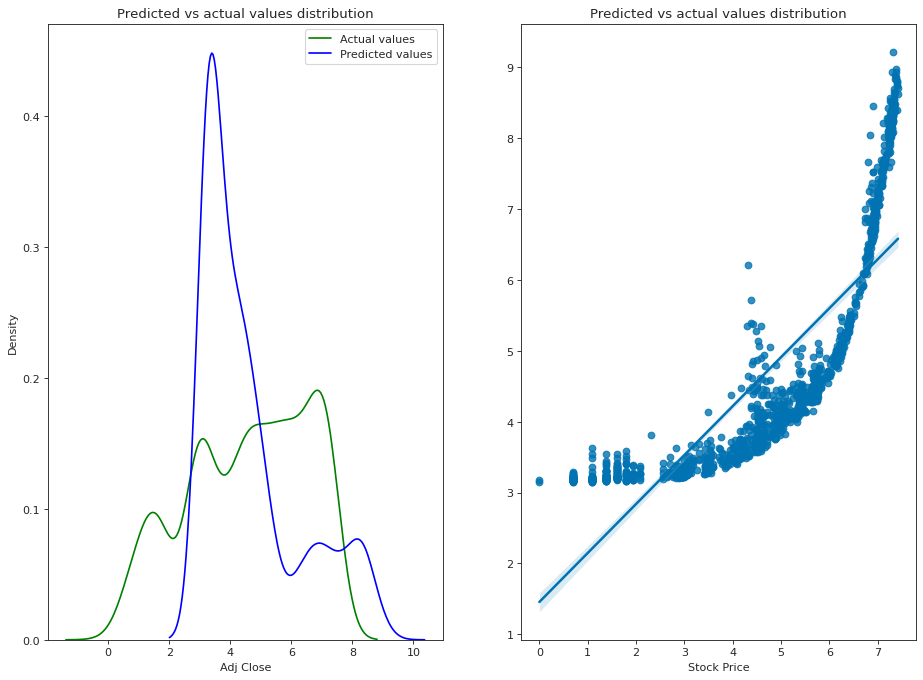

Mean absolute error of LinearRegression(): 0.882618353086609


In [76]:


fig, axs = plt.subplots(1, 2, figsize=(14, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)

sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
# plt.legend()
ax1.legend()
plt.show()
plt.close()

print("Mean absolute error of {0}: {1}".format(model_lin, mean_abs_error))

#### Predicting  using Random Forest Regressor

In [77]:
# Building the model for Adj close prediction

# we want to predict the adjusted close price
y = np.log(hdfc_data['Adj Close'].astype(int))
# predictive variables (removing Adj close from it)
X = hdfc_data.drop('Adj Close', axis=1)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (5434, 5)
y_train (5434,)
x_test (1359, 5)
y_test (1359,)


In [108]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=47)
model_rf.fit(X_train, y_train)
predict = model_rf.predict(X_test)
predict  

array([4.89082249, 5.37568811, 7.08361972, ..., 6.83780148, 4.86427996,
       4.18965245])

##### calculation of the mean absolute error

In [109]:
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.005254883276083715

## View predictions and actual values

In [110]:

# print(np.c_[y_test,predict])
display_ = pd.DataFrame({'Actual value': y_test, 'Predicted value': predict})
display_.head(20)

# print(y_test,predict)

,Actual value,Predicted value
Date,,
2008-02-22,4.890349,4.890822
2012-01-17,5.375278,5.375688
2019-05-31,7.075809,7.083620
2006-08-24,4.330733,4.325430
2021-11-08,7.365813,7.368260
2017-12-20,6.807935,6.814358
2019-09-16,7.006695,7.003482
2000-07-13,3.091042,3.121714
2014-10-13,6.028279,6.020719


From the table, we can see that the `RandomForestRegressor` performed very well and the actual and predicted Adjusted close value are fairly close. Let us now view the plots.

##  Final visuals

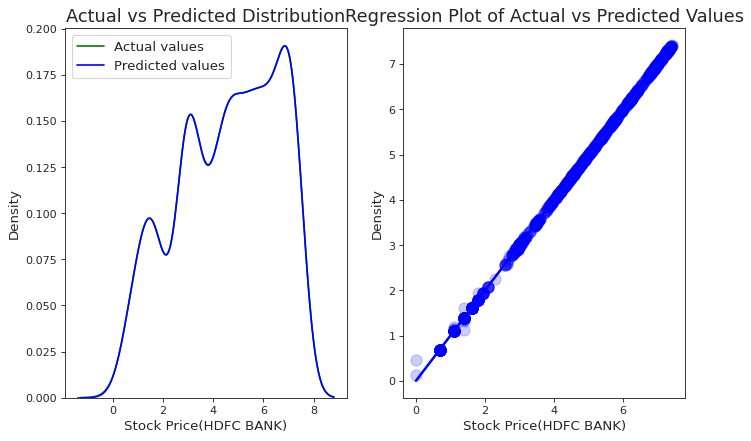

Mean absolute error of RandomForestRegressor(random_state=47): 0.005254883276083715


In [83]:

# Create subplots with 2 plots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=80)

# Set titles for subplots
axs[0].set_title('Actual vs Predicted Distribution', fontsize=16)
axs[1].set_title('Regression Plot of Actual vs Predicted Values', fontsize=16)

# Plot the KDE plots of actual and predicted values on the first subplot
sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
sns.kdeplot(data=predict, color="b", label='Predicted values', ax=axs[0])

# Plot the regression plot of actual and predicted values on the second subplot
sns.regplot(x=y_test, y=predict, ax=axs[1], color='blue', scatter_kws={
            'alpha': 0.2, 's': 100})

# Set labels for x-axis and y-axis on both subplots
for i in range(2):
    axs[i].set_xlabel('Stock Price(HDFC BANK)', fontsize=12)
    axs[i].set_ylabel('Density', fontsize=12)

# Set legend for the first subplot
axs[0].legend(fontsize=12)

# Display the plot
plt.show()

# Print the mean absolute error
print("Mean absolute error of {0}: {1}".format(model_rf, mean_abs_error))

From the above, we can see that the model is trained and evaluated using `RandomForestRegressor`. The predicted and actual adjustable stock prices plots look are relatively similar with a mean absolute error is 0.0494 which is good.

In [84]:
import os
os.system('jupyter nbconvert --to markdown Amit_NSE_Stock_Price_Predictor.ipynb')


0